In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image,ImageFilter
import numpy as np
import cv2

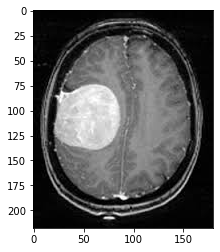

In [5]:
im = img.imread('Y1.jpg')
plt.imshow(im)

In [6]:
im.shape

(218, 180, 3)

In [7]:
#Taking weight sum to convert to grayscale
g_im=0.3*im[:,:,0]+0.6*im[:,:,1]+0.1*im[:,:,2];

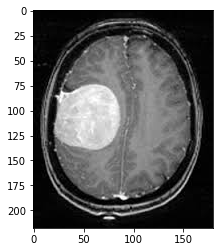

In [8]:
plt.imshow(g_im,cmap='gray')

In [9]:
g_im.shape

(218, 180)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):

    noisy_image = np.copy(image)

    salt_mask = np.random.rand(*image.shape) < salt_prob
    noisy_image[salt_mask] = 1.0

    
    pepper_mask = np.random.rand(*image.shape) < pepper_prob
    noisy_image[pepper_mask] = 0.0

    return noisy_image


salt_probability = 0.02  
pepper_probability = 0.02  


noisy_image = add_salt_and_pepper_noise(g_im, salt_probability, pepper_probability)

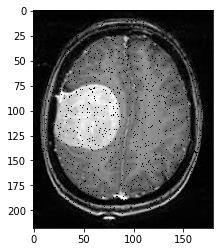

In [11]:
plt.imshow(noisy_image,cmap='gray')

In [12]:
import numpy as np
from scipy.ndimage import convolve

def median_filter(image, filter_size):
   
    pad_size = filter_size // 2
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i+filter_size, j:j+filter_size]
            filtered_image[i, j] = np.median(neighborhood)

    return filtered_image


filter_size = 3
filtered_image = median_filter(noisy_image, filter_size)

E:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
g1 = Image.open('Y1.jpg').convert('L')
filtered_img = g1.filter(ImageFilter.MedianFilter(size = 3)) 

(<AxesSubplot:title={'center':'Without inbuilt'}>,
 Text(0.5, 1.0, 'Without inbuilt'))

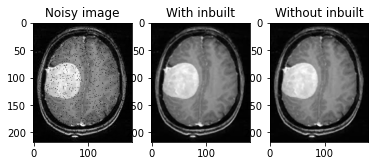

In [14]:
plt.subplot(131), plt.imshow(noisy_image, 'gray'), plt.title('Noisy image')
plt.subplot(132), plt.imshow(filtered_img, 'gray'), plt.title('With inbuilt')
plt.subplot(133), plt.imshow(filtered_image, 'gray'), plt.title('Without inbuilt')


In [25]:
def skull_strip_mri(image_path):
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary_mask = cv2.threshold(original_image, 25, 255, cv2.THRESH_BINARY)

    kernel = np.ones((11,11), np.uint8)
    eroded_mask = cv2.erode(binary_mask, kernel, iterations=1)
    dilated_mask = cv2.dilate(eroded_mask, kernel, iterations=1)

    skull_stripped_image = cv2.bitwise_and(original_image, original_image, mask=dilated_mask)
    
    return skull_stripped_image



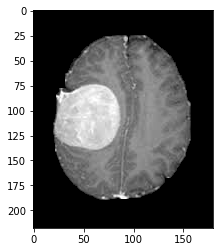

In [16]:
imgpath = r'C:\Users\ishan\Downloads\Y1.jpg'
skull_image = skull_strip_mri(imgpath)
cv2.imwrite(r'C:\Users\ishan\Downloads\sk.jpg', skull_image)
plt.imshow(skull_image,'gray')

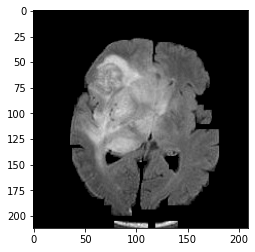

In [26]:
imgpath1 = r'C:\Users\ishan\Downloads\Y2.jpg'

skull_image1 = skull_strip_mri(imgpath1)
plt.imshow(skull_image1,'gray')

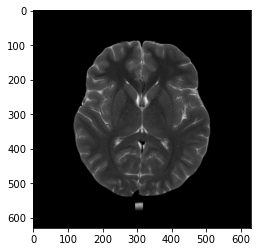

In [15]:
imgpath2 = r'C:\Users\ishan\Downloads\N1.jpEg'

skull_image2 = skull_strip_mri(imgpath2)
plt.imshow(skull_image2,'gray')

In [22]:
def bitwise_and_custom(image, mask):
    result = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i, j] = image[i, j] & mask[i, j]

    return result

def threshold(image, threshold):
    p,q = image.shape
    result = np.zeros((p,q), dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] > threshold:
                result[i, j] = 255

    return result



In [20]:
def custom_dilation(img, kernel_size):
    p, q = img.shape
    constant1 = (kernel_size - 1) // 2
    structuring_element = np.ones((kernel_size, kernel_size), dtype=np.uint8)

    img_dilate = np.zeros((p, q), dtype=np.uint8)

    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            temp = img[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * structuring_element
            img_dilate[i, j] = np.max(product)

    return img_dilate


def custom_erosion(img, kernel_size):
    m, n = img.shape
    k = kernel_size
    constant = (k - 1) // 2
    SE = np.ones((k, k), dtype=np.uint8)

    img_erode = np.zeros((m, n), dtype=np.uint8)

    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = img[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SE
            img_erode[i, j] = np.min(product)

    return img_erode

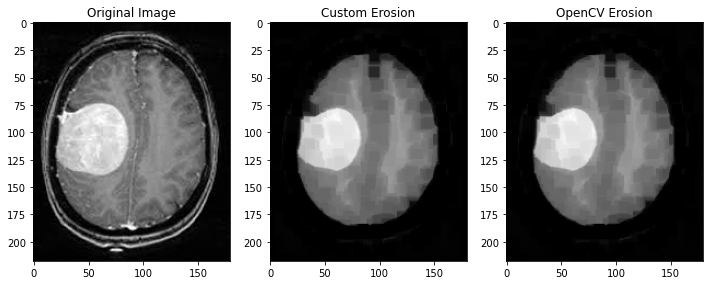

In [18]:
image_path = r'C:\Users\ishan\Downloads\Y1.jpg'

img_original_erode = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
kernel_size_erode = 9


img_eroded_custom = custom_erosion(img_original_erode, kernel_size_erode)


kernel = np.ones((kernel_size_erode, kernel_size_erode), np.uint8)
img_eroded_opencv = cv2.erode(img_original_erode, kernel, iterations=1)


plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_original_erode, cmap="gray")
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(img_eroded_custom, cmap="gray")
plt.title("Custom Erosion")

plt.subplot(1, 3, 3)
plt.imshow(img_eroded_opencv, cmap="gray")
plt.title("OpenCV Erosion")

plt.show()


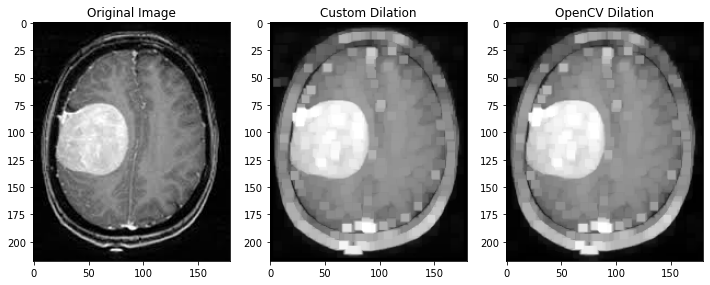

In [19]:
image_path = r'C:\Users\ishan\Downloads\Y1.jpg'
img_original_dilate = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
kernel_size_dilate = 7


img_dilated_custom = custom_dilation(img_original_dilate, kernel_size_dilate)


kernel = np.ones((kernel_size_dilate, kernel_size_dilate), np.uint8)
img_dilated_opencv = cv2.dilate(img_original_dilate, kernel, iterations=1)

# Display the images for comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_original_dilate, cmap="gray")
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(img_dilated_custom, cmap="gray")
plt.title("Custom Dilation")

plt.subplot(1, 3, 3)
plt.imshow(img_dilated_opencv, cmap="gray")
plt.title("OpenCV Dilation")

plt.show()


In [20]:
def skull_strip(image):
    binary_mask = threshold(image,25)
    
    eroded_mask = custom_erosion(binary_mask,27)
    dilated_mask = custom_dilation(eroded_mask,27)

    skull_stripped_image = cv2.bitwise_and(image, image, mask=dilated_mask)
    return skull_stripped_image



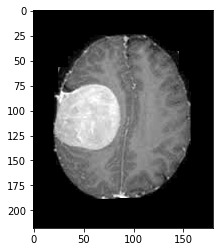

In [21]:
plt.imshow(skull_strip(g_im),'gray')

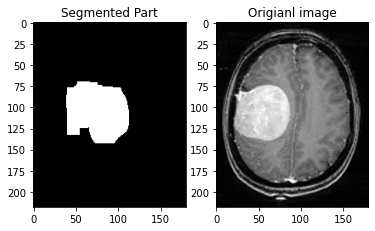

In [22]:

bin_img = threshold(skull_image,220)
image_path = r'C:\Users\ishan\Downloads\Y1.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
def custom_watershed(image, markers):
    height, width = image.shape[:2]
    labels = np.zeros((height, width), dtype=np.int32)
    current_label = 0

  
    def get_neighbors(pixel):
        i, j = pixel
        return np.mgrid[
            max(0, i - 1):min(height, i + 2),
            max(0, j - 1):min(width, j + 2)
        ].reshape(2, -1).T

   
    queue = []

   
    for i in range(height):
        for j in range(width):
            if markers[i, j] == 1:  # Sure Background
                labels[i, j] = 0
            elif markers[i, j] == 2:  # Sure Foreground
                labels[i, j] = current_label
                current_label += 1
                queue.append((i, j))
            elif markers[i, j] == -1:  # Unknown
                labels[i, j] = -1

    while queue:
        i, j = queue.pop(0)

        
        neighbors = get_neighbors((i, j))

        for ni, nj in neighbors:
            if 0 <= ni < height and 0 <= nj < width and markers[ni, nj] == 0 and labels[ni, nj] == 0:
                labels[ni, nj] = labels[i, j]
                queue.append((ni, nj))

    return labels


kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel, iterations=1)
opening = opening.astype(np.uint8)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)


markers = markers + 1


markers[unknown == 255] = 0


result_labels = custom_watershed(original_image, markers)


segmented_mask = np.where(result_labels > 0, 1, 0)
eroded_mask1 = custom_erosion(segmented_mask,11)
dilated_mask1 = custom_dilation(eroded_mask1,15)
# Display the result with segmented part in white
plt.subplot(1,2,1)
plt.imshow(dilated_mask1, cmap='gray')
plt.title('Segmented Part')
plt.subplot(1,2,2)
plt.imshow(original_image, cmap='gray')
plt.title('Origianl image')

plt.show()




In [23]:
original_image = skull_image

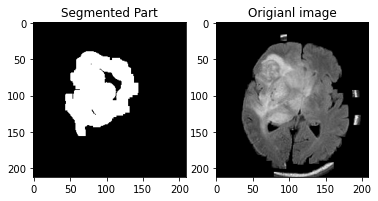

In [24]:

bin_img = threshold(skull_image1,120)
image_path = r'C:\Users\ishan\Downloads\Y2.jpeg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
def custom_watershed(image, markers):
    height, width = image.shape[:2]
    labels = np.zeros((height, width), dtype=np.int32)
    current_label = 0

    
    def get_neighbors(pixel):
        i, j = pixel
        return np.mgrid[
            max(0, i - 1):min(height, i + 2),
            max(0, j - 1):min(width, j + 2)
        ].reshape(2, -1).T

    
    queue = []

    
    for i in range(height):
        for j in range(width):
            if markers[i, j] == 1:  # Sure Background
                labels[i, j] = 0
            elif markers[i, j] == 2:  # Sure Foreground
                labels[i, j] = current_label
                current_label += 1
                queue.append((i, j))
            elif markers[i, j] == -1:  # Unknown
                labels[i, j] = -1

    while queue:
        i, j = queue.pop(0)

        
        neighbors = get_neighbors((i, j))

        for ni, nj in neighbors:
            if 0 <= ni < height and 0 <= nj < width and markers[ni, nj] == 0 and labels[ni, nj] == 0:
                labels[ni, nj] = labels[i, j]
                queue.append((ni, nj))

    return labels


kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel, iterations=1)
opening = opening.astype(np.uint8)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)


markers = markers + 1


markers[unknown == 255] = 0
original_image= skull_image1
# Perform custom watershed segmentation
result_labels = custom_watershed(original_image, markers)

# Create a binary mask where segmented part is 1 and background is 0
segmented_mask = np.where(result_labels > 0, 1, 0)

# Display the result with segmented part in white
plt.subplot(1,2,1)
plt.imshow(segmented_mask, cmap='gray')
plt.title('Segmented Part')
plt.subplot(1,2,2)
plt.imshow(skull_image1, cmap='gray')
plt.title('Origianl image')

plt.show()





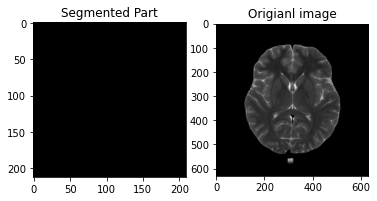

In [25]:

bin_img = threshold(skull_image2,120)
image_path = r'C:\Users\ishan\Downloads\Y2.jpeg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
def custom_watershed(image, markers):
    height, width = image.shape[:2]
    labels = np.zeros((height, width), dtype=np.int32)
    current_label = 0

    
    def get_neighbors(pixel):
        i, j = pixel
        return np.mgrid[
            max(0, i - 1):min(height, i + 2),
            max(0, j - 1):min(width, j + 2)
        ].reshape(2, -1).T

    
    queue = []

    for i in range(height):
        for j in range(width):
            if markers[i, j] == 1:  # Sure Background
                labels[i, j] = 0
            elif markers[i, j] == 2:  # Sure Foreground
                labels[i, j] = current_label
                current_label += 1
                queue.append((i, j))
            elif markers[i, j] == -1:  # Unknown
                labels[i, j] = -1

    while queue:
        i, j = queue.pop(0)

    
        neighbors = get_neighbors((i, j))

        for ni, nj in neighbors:
            if 0 <= ni < height and 0 <= nj < width and markers[ni, nj] == 0 and labels[ni, nj] == 0:
                labels[ni, nj] = labels[i, j]
                queue.append((ni, nj))

    return labels


kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel, iterations=1)
opening = opening.astype(np.uint8)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)


markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0
original_image= skull_image1
# Perform custom watershed segmentation
result_labels = custom_watershed(original_image, markers)

# Create a binary mask where segmented part is 1 and background is 0
segmented_mask = np.where(result_labels > 0, 1, 0)

# Display the result with segmented part in white
plt.subplot(1,2,1)
plt.imshow(segmented_mask, cmap='gray')
plt.title('Segmented Part')
plt.subplot(1,2,2)
plt.imshow(skull_image2, cmap='gray')
plt.title('Origianl image')

plt.show()





In [26]:
import sys
import cv2
import numpy

def neighbourhood(image, x, y):
   
    neighbour_region_numbers = {}
    for i in range(-1, 2):
        for j in range(-1, 2):
            if (i == 0 and j == 0):
                continue
            if (x+i < 0 or y+j < 0): # If coordinates out of image range, skip
                continue
            if (x+i >= image.shape[0] or y+j >= image.shape[1]): # If coordinates out of image range, skip
                continue
            if (neighbour_region_numbers.get(image[x+i][y+j]) == None):
                neighbour_region_numbers[image[x+i][y+j]] = 1 # Create entry in dictionary if not already present
            else:
                neighbour_region_numbers[image[x+i][y+j]] += 1 # Increase count in dictionary if already present

  
    if (neighbour_region_numbers.get(0) != None):
        del neighbour_region_numbers[0]

   
    keys = list(neighbour_region_numbers)

 
    keys.sort()

    if (keys[0] == -1):
        if (len(keys) == 1): 
            return -1
        elif (len(keys) == 2):
            return keys[1]
        else: # Watershed
            return 0
    else:
        if (len(keys) == 1): 
            return keys[0]
        else: # Watershed
            return 0

def watershed_segmentation(image):
    intensity_list = []
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            intensity_list.append((image[x][y], (x, y)))


    intensity_list.sort()
    segmented_image = numpy.full(image.shape, -1, dtype=int)
    region_number = 0
    for i in range(len(intensity_list)):
        intensity = intensity_list[i][0]
        x = intensity_list[i][1][0]
        y = intensity_list[i][1][1]

        # Get the region number of the current pixel's region by checking its neighbouring pixels
        region_status = neighbourhood(segmented_image, x, y)

        # Assign region number (or) watershed accordingly, at pixel (x, y) of the segmented image
        if (region_status == -1): # Separate region
            region_number += 1
            segmented_image[x][y] = region_number
        elif (region_status == 0): # Watershed
            segmented_image[x][y] = 0
        else: # Part of another region
            segmented_image[x][y] = region_status

    # Return the segmented image
    return segmented_image


img = watershed_segmentation(skull_image)

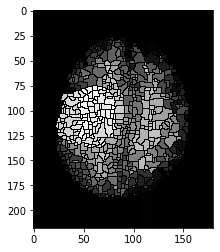

In [27]:
plt.imshow(img,'gray')

In [28]:
img.shape

(218, 180)

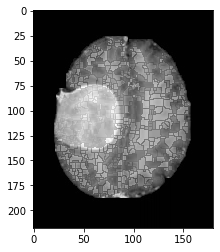

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

original_image = cv2.imread(r'C:\Users\ishan\Downloads\sk.jpg')
segmented_color_map = cv2.applyColorMap(np.uint8(img), cv2.COLORMAP_JET)
result = cv2.addWeighted(original_image, 0.8, segmented_color_map, 0.3, 0)
result_gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
plt.imshow(result_gray,'gray')


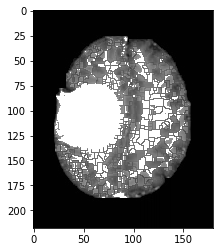

In [30]:
b = threshold(result_gray,150)
plt.imshow(b,'gray')

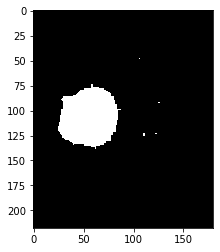

In [43]:
import cv2
import numpy as np


segmented_image = b



gray_matter_mask = (segmented_image > 0) & (segmented_image <= 128)
white_matter_mask = (segmented_image > 128)


gray_matter_intensity = np.mean(segmented_image[gray_matter_mask])
white_matter_intensity = np.mean(segmented_image[white_matter_mask])


if gray_matter_intensity > white_matter_intensity:
    tumor_region = gray_matter_mask
else:
    tumor_region = white_matter_mask



plt.imshow(tumor_region.astype(np.uint8)*255,'gray')

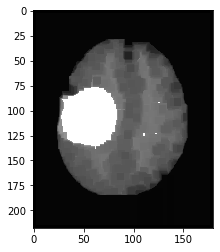

In [32]:
eroded_image = custom_erosion(b,7)
plt.imshow(eroded_image,'gray')